<a href="https://colab.research.google.com/github/RJZauner/linear_regression_prj/blob/main/cali_housing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting housing prices using Regression

##Summary
The dataset used is the publicly available dataset from the sklearn library called "California Housing". We will be using regression to predict the median housing prices in california.

Dataset: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

## Metrics

The following metrics are used to evaluate the performance of the regression model.

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)

# Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Loading Dataset

Let us load in the dataset.

The dataset is available as part of the sklearn library.

We will use the built-in function to fetch the dataset, split it into input and label dataframes.

We will split the dataframe into two parts: One for our predictors and one for our labels. We then further split the dataset into training and test datasets.

Using ```df.shape``` we can see that each dataframe has the same length.

In [ ]:
input, label = datasets.fetch_california_housing(return_X_y = True, as_frame = True)

x_train, x_test, y_train, y_test = train_test_split(
       input, label, test_size = 0.4, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20640, 8)
(20640,)


In [ ]:
print(x_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
print(x_train.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


We have successfully created two dataframes, one with our predictors in it and the other with our labels that are going to be predicted.

Let us quickly visualise the individual columns.

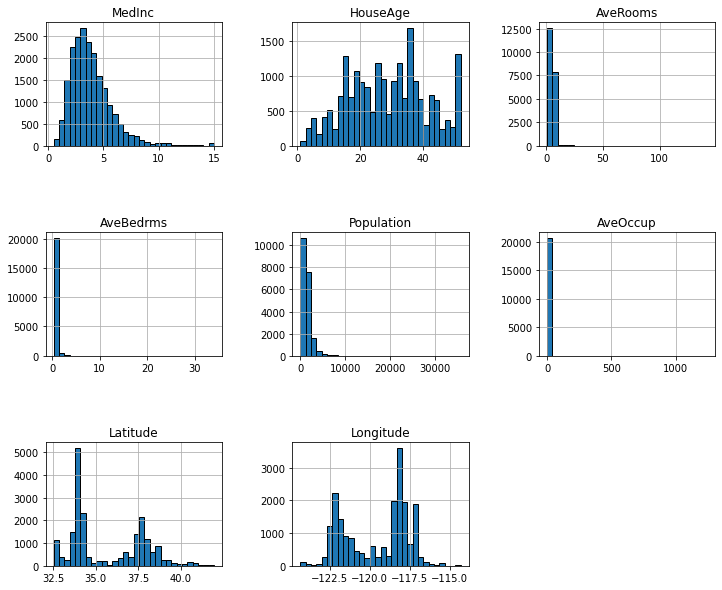

In [ ]:
x_train.hist(figsize = (12, 10), bins = 30, edgecolor = "black")
plt.subplots_adjust(hspace = 0.7, wspace = 0.4)

# Exploring the data

In [ ]:
print(x_train.head())
print(x_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
print(x_train.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

## Check for nulls

In [ ]:
print(x_train.isnull().values.any())
print(x_train.isnull().values.any())

False
False


## Data Visualisation

The latitude and longitude acn be visulised to help us better understand areas with higher housing prices.

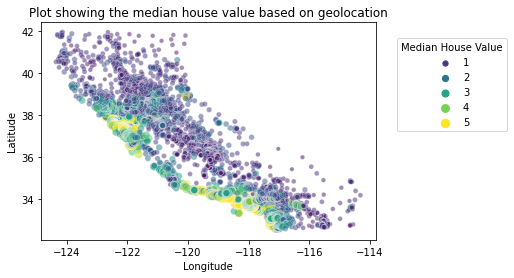

In [ ]:
sns.scatterplot(data = x_train, x = "Longitude", y = "Latitude",
                size = "MedHouseVal", hue = "MedHouseVal",
                palette = "viridis", alpha = 0.5)

plt.legend(title = "Median House Value", 
           bbox_to_anchor = (1.05, 0.95),
           loc = "upper left")

_ = plt.title("Plot showing the median house value based on geolocation")

The plot above looks messy, so let us use a random sub-sample of our data to get a better idea of what is going on.

In [ ]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(x_train.shape[0]), size=500,
                     replace=False)

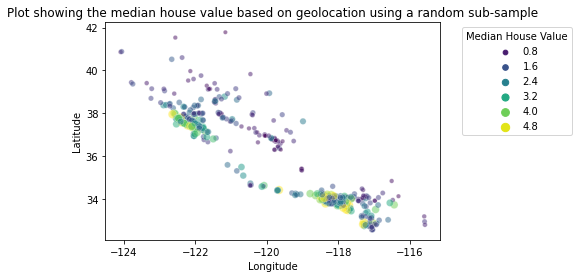

In [ ]:
sns.scatterplot(data = x_train.iloc[indices],
                x = "Longitude", y = "Latitude",
                size = "MedHouseVal", hue = "MedHouseVal",
                palette = "viridis", alpha = 0.5)

plt.legend(title = "Median House Value", bbox_to_anchor = (1.05, 1),
           loc = "upper left")

_ = plt.title("Plot showing the median house value based on geolocation using a random sub-sample")

We can also create a pair-plot that shows us how each feature in our datasets relates to our target variable.

We will quantise the target column to create our histograms.

In [ ]:
columns_drop = ["Longitude", "Latitude"]

subset = x_train.iloc[indices].drop(columns = columns_drop)

# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins = False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

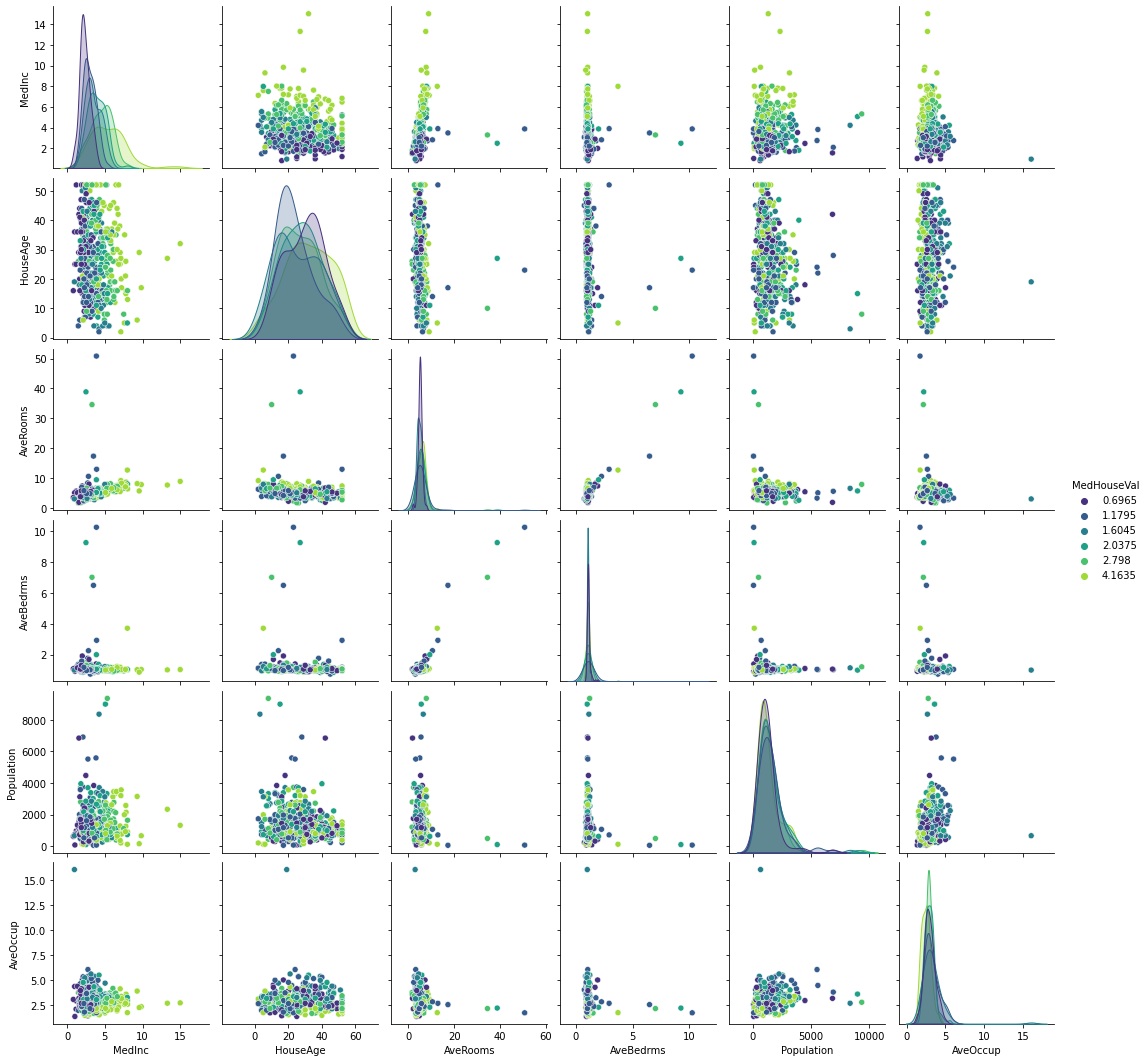

In [ ]:
_ = sns.pairplot(data = subset, hue = "MedHouseVal", palette = "viridis")

## Summary
A quick check of the vitals shows that we have a few entries that have a large number of rooms e.g. 52 or 132.

These entries are most likely outliers, seeing as there is a huge difference between the 75-percentile and the max value - the visualisations also show this pattern.

From the visualisation we created for the latitude and longitude, we can see that the more expensive areas are located at the shore - where the big cities are. 

Therefore it is reasonable to assume, that these two features will help us in predicting housing prices.

# Experiment 1 using Linear Regression

For our baseline model we will be using the LinearRegression() algorithm.

We use GridSearch to select the best model and perform cross-validation to counteract overfitting.

In [ ]:
regression_model = linear_model.LinearRegression()

regression_model.fit(x_train, y_train)

housing_y_pred = regression_model.predict(x_test)

# The coefficients
print("Coefficients: \n", regression_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, housing_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, housing_y_pred))

Coefficients: 
 [ 4.44292656e-01  9.53366049e-03 -1.15946079e-01  6.25883560e-01
 -7.23441219e-06 -3.60266393e-03 -4.12049252e-01 -4.24964747e-01]
Mean squared error: 0.54
Coefficient of determination: 0.60


# Results

- MSE: 0,54
- Coefficient of determination: 0,60

In [ ]:
print(housing_y_pred)
print(y_test)

[2.27589787 2.79533676 1.90725308 ... 3.03637226 2.11506594 1.17390064]
14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
14805    1.875
1309     0.758
20500    2.270
19328    1.878
16443    1.135
Name: MedHouseVal, Length: 8256, dtype: float64


# Using SKlearn Pipelines

Metric is always R2 for Regression when using pipelines.

In [ ]:
linear_regression_pipeline = Pipeline([('scl', StandardScaler()),
                    ('reg_model', regression_model)])

linear_regression_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('reg_model', LinearRegression())])

In [ ]:
perf = linear_regression_pipeline.score(x_test, y_test)

print("Coefficient of determination: %.2f" % perf)

Coefficient of determination: 0.60


# Experiment 2 using Gradient Boosting

In [ ]:
reg_pipe = Pipeline([('scl', StandardScaler()),
                    ('reg_model', GradientBoostingRegressor())])

reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('reg_model', GradientBoostingRegressor())])

In [ ]:
perf = reg_pipe.score(x_test, y_test)

print("Coefficient of determination: %.2f" % perf)

Coefficient of determination: 0.78


## Tuning the hyperparameters for better performance

Using GridSearchCV() we will define a set of values to iterate through and select the best performing combination.

In [ ]:
parameters = {
    "n_estimators":[500, 750, 1000],
    "max_depth": [7, 10],
    "learning_rate":[0.1, 1]
}

gbr = GradientBoostingRegressor()

search = GridSearchCV(gbr, parameters, cv = 2, n_jobs = -1)
search.fit(x_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.818):
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 750}


Parameters: {
  "n_estimators": 750,
  "max_depth": 7,
  "learning_rate": 0.1}

##GridSearch Results
Score: 0,82

learning_rate: 0.1

max_depth: 7

n_estimators: 500